# <div class="alert alert-block alert-success"><center>Presidential Election<br><br>Expense Disbursement Text Analysis <br><br>2008-2020<center>

## <div class="alert alert-block alert-info"><center>2008 Election<br><br>Obama Part<center>

## Data Preparation 

**<div class="alert alert-block alert-warning">#1  load data**

In [1]:
%pylab inline
import pandas as pd
df_obama=pd.read_csv('obama2008.csv')

Populating the interactive namespace from numpy and matplotlib


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,14,16,17,47,48,49,51,72,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
len(df_obama)

117849

In [3]:
df_obama = df_obama[['committee_id', 'report_year', 'disbursement_date','recipient_name',\
                     'recipient_state','recipient_city',\
                     'disbursement_purpose_category','disbursement_description','disbursement_amount']]

In [4]:
df_obama.disbursement_purpose_category.nunique()

7

In [5]:
df_obama.disbursement_purpose_category.unique()

array(['REFUNDS', 'OTHER', 'TRAVEL', 'ADVERTISING', 'ADMINISTRATIVE',
       'FUNDRAISING', 'MATERIALS'], dtype=object)

**<div class="alert alert-block alert-warning">#2 many uncategorized items under 'other'**

In [6]:
df_obama.groupby('disbursement_purpose_category').agg({'disbursement_purpose_category':'count','disbursement_amount':'sum'})

,disbursement_purpose_category,disbursement_amount
disbursement_purpose_category,,
ADMINISTRATIVE,4769,2.289567e+07
ADVERTISING,3722,3.903547e+08
FUNDRAISING,2206,2.542922e+06
MATERIALS,28,1.604821e+04
OTHER,59349,2.312260e+08
REFUNDS,6433,5.086160e+06
TRAVEL,41342,7.687753e+07


**<div class="alert alert-block alert-warning">#3 delete irrelevant rows: nan, refunds**

In [7]:
df_obama.disbursement_description.nunique()

98

In [8]:
df_obama.disbursement_description.unique()

array(['CONTRIBUTION REFUND', nan, 'PAYROLL', 'UNLIMITED TRANSFER',
       'BANK CHARGES/FEES', 'CREDIT CARD FEES', 'PAYROLL TAXES',
       'PAYROLL PROCESSING FEE', 'CONS./PROF.SERV. FUNDRAISING',
       'TRAVEL/LODGING', 'TELEPHONE', 'PRINTING', 'EQUIPMENT RENTAL',
       'DELIVERY', 'CATERING/FACILITIES', 'WEB SITE HOSTING',
       'OFFICE SUPPLIES', 'COMPUTER SOFTWARE', 'COMPUTER EQUIP',
       'STAGING, SOUND, LIGHTING', 'EQUIPMENT', 'CONS./PROF.SERV. MEDIA',
       'CONS./ACCT.SERV.', 'SECURITY', 'PHOTOGRAPHY', 'PER DIEM',
       'ADVANCE WORK', 'ON-LINE ADVERTISING', 'TRAVEL AGENCY FEES',
       'EVENT SITE RENTAL', 'RESEARCH MATERIALS', 'PRINT ADVERTISING',
       'POLLING', 'MEDIA BUY', 'LICENSE FEES', 'INTERPRETING SERVICE',
       'EQUIPMENT MAINTENANCE', 'DECORATIONS', 'TELEMARKETING',
       'UTILITIES', 'DOMAIN WEBSITES', 'STRATEGY',
       'CONS./PROF.SERV. RESEARCH', 'RENT/OCCUPANCY', 'POSTAGE',
       'CONS/PROF.SERV. COMPUTER', 'PUBLICATIONS/ SUBSCRIPTIONS',
       'I

In [9]:
df_obama.drop(df_obama[df_obama['disbursement_purpose_category'] == 'REFUNDS'].index, inplace = True) 
df_obama.drop(df_obama[df_obama['disbursement_description'] == 'CONTRIBUTION REFUND'].index, inplace = True) 
df_obama = df_obama[df_obama['disbursement_description'].notna()]

In [10]:
df_obama.isnull().sum()

committee_id                       0
report_year                        0
disbursement_date                  0
recipient_name                     0
recipient_state                  174
recipient_city                   115
disbursement_purpose_category      0
disbursement_description           0
disbursement_amount                0
dtype: int64

In [11]:
obama_cat_sum = df_obama.groupby('disbursement_description').agg({'disbursement_description':'count','disbursement_amount':'sum'})

In [12]:
obama_cat_sum.rename(columns={'disbursement_description':'count'}, inplace=True)

In [13]:
pd.options.display.max_rows = None

**<div class="alert alert-block alert-warning">#4 a glimpse of the data for further analysis**

In [14]:
obama_cat_sum.sort_values('count',ascending=False,na_position='first')

,count,disbursement_amount
disbursement_description,,
TRAVEL/LODGING,41215,7.683830e+07
PAYROLL,17920,3.088012e+07
TRAVEL AGENCY FEES,14734,4.202970e+05
PER DIEM,7823,2.785564e+06
"STAGING, SOUND, LIGHTING",3406,2.668376e+07
TELEPHONE,3337,5.261824e+06
PAYROLL TAXES,2477,3.480334e+06
ON-LINE ADVERTISING,2334,3.440741e+07
CATERING/FACILITIES,2046,2.486207e+06


In [15]:
len(df_obama)

111362

## Text Clustering 

In [17]:
# Get tokens 
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text): 
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace(): #skip space
            continue
        elif token.like_num: # delete numbers
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [18]:
# Get the puntuations set
import string
en_punct = set(string.punctuation)

# Get the stop words set
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

# Get Lemmas for LDA analysis (function)
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

def get_lemma(word):
    return WordNetLemmatizer().lemmatize(word) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
#Combine functions 
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if token not in en_punct] # delete punctuations
    tokens = [token for token in tokens if len(token) > 1] # at least 2 letters consist a word
    tokens = [token for token in tokens if token not in en_stop] # delete stop words
    tokens = [get_lemma(token) for token in tokens] # delete word variants for accurate result
    return tokens

In [54]:
# Import data for LDA analysis and return text_data
import random
text_data = []
for line in df_obama['disbursement_description']:
    tokens = prepare_text_for_lda(line)
    if random.random() > .99:
        #print(tokens)
        text_data.append(tokens)

In [55]:
# Cluster topics
from gensim import corpora 
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [56]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [70]:
import gensim # package for topic modeling
NUM_TOPICS = 5 # trial number based on understanding of the data file & research aims, we can lock down this number before presentation
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=20)
ldamodel.save('model.gensim')
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.418*"travel" + 0.307*"lodging" + 0.112*"agency" + 0.112*"fee" + 0.019*"facility" + 0.019*"catering"')
(1, '0.758*"payroll" + 0.080*"tax" + 0.033*"computer" + 0.021*"equip" + 0.017*"contribution" + 0.013*"software"')
(2, '0.177*"sound" + 0.177*"lighting" + 0.177*"staging" + 0.075*"rental" + 0.075*"site" + 0.060*"event"')
(3, '0.185*"advertising" + 0.126*"line" + 0.112*"medium" + 0.090*"production" + 0.090*"exp" + 0.061*"fee"')
(4, '0.241*"per" + 0.241*"diem" + 0.129*"telephone" + 0.058*"printing" + 0.041*"office" + 0.041*"supply"')


In [26]:
import pyLDAvis 

In [27]:
import pyLDAvis.gensim

In [69]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display) 

<img src="2008_Obama.png">

## <div class="alert alert-block alert-danger"><center>2008 Election<br><br>Mccain Part<center>

## Data Preparation 

In [29]:
import pandas as pd
df_mccain=pd.read_csv('mccain2008.csv')
len(df_mccain)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,16,17,23,24,26,27,28,29,31,33,34,47,48,49,66,72,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


36905

In [30]:
df_mccain = df_mccain[['committee_id', 'report_year', 'disbursement_date','recipient_name',\
                     'recipient_state','recipient_city',\
                     'disbursement_purpose_category','disbursement_description','disbursement_amount']]

In [31]:
df_mccain.drop(df_mccain[df_mccain['disbursement_purpose_category'] == 'REFUNDS'].index, inplace = True) 
df_mccain.drop(df_mccain[df_mccain['disbursement_description'] == 'CONTRIBUTION REFUND'].index, inplace = True) 
df_mccain = df_mccain[df_mccain['disbursement_description'].notna()]

In [32]:
df_mccain.groupby('disbursement_purpose_category').agg({'disbursement_purpose_category':'count','disbursement_amount':'sum'})

,disbursement_purpose_category,disbursement_amount
disbursement_purpose_category,,
ADMINISTRATIVE,1931,2.829597e+07
ADVERTISING,836,1.291919e+08
FUNDRAISING,716,3.170042e+06
LOAN-REPAYMENTS,11,9.896459e+06
MATERIALS,32,6.420286e+06
OTHER,20225,1.499796e+08
TRANSFERS,26,1.591220e+07


## Text Clustering 

In [33]:
# Import data for LDA analysis and return text_data
import random
text_data = []
for line in df_mccain['disbursement_description']:
    tokens = prepare_text_for_lda(line)
    if random.random() > .99:
        #print(tokens)
        text_data.append(tokens)

In [34]:
from gensim import corpora 
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [35]:
import gensim # package for topic modeling
NUM_TOPICS = 4 # trial number based on understanding of the data file & research aims, we can lock down this number before presentation
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=20)
ldamodel.save('model.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.255*"transfer" + 0.106*"catering" + 0.072*"staging" + 0.060*"postage"')
(1, '0.644*"travel" + 0.080*"rental" + 0.045*"equipment" + 0.037*"facility"')
(2, '0.372*"payroll" + 0.071*"printing" + 0.047*"fee" + 0.036*"support"')
(3, '0.124*"service" + 0.099*"food" + 0.099*"beverage" + 0.059*"equipment"')


In [36]:
import pyLDAvis.gensim

In [37]:
import pyLDAvis 
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display) 

<img src="2008_Mccain.png">

## <div class="alert alert-block alert-success"><center>Keyword Conparison and Conclusion</div><center>

([<matplotlib.axis.XTick at 0x7ff282684e50>,
 [Text(0, 0, 'Topic 1'),
  Text(0, 0, 'Topic 2'),
  Text(0, 0, 'Topic 3'),
  Text(0, 0, 'Topic 4'),
  Text(0, 0, 'Topic 5')])

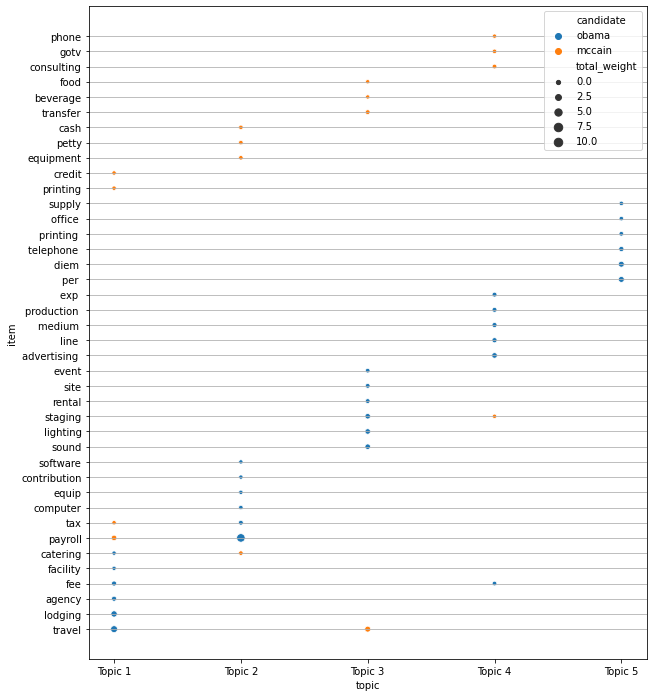

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf()
sns.scatterplot(y='item', x='topic',hue='candidate', data=dt08, size = 'total_weight' )
fig.set_size_inches(10, 12)
plt.grid(axis="y")
plt.xticks([0,1,2,3,4], ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])

**<div class="alert alert-block alert-warning">Top Expense Keywords<br><br><li>Obama:<br><br>Payroll | Travel, Lodging | Per diem | Advertising | Lighting, Sound, Staging<br><br><li>Mccain:<br><br>Travel | Payroll | Consulting | Catering**

## 2012 Obama v.s. Romney

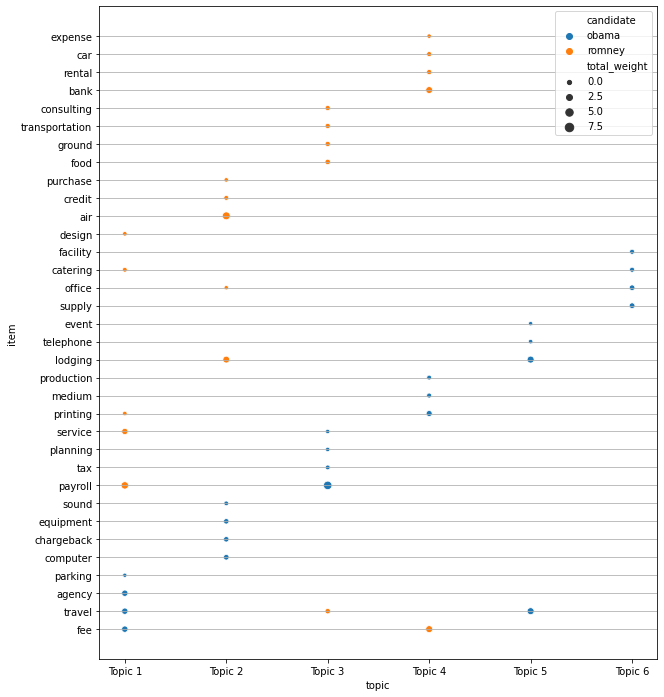

In [36]:
dt12 = ew_data[ew_data.term ==2012]
sns.scatterplot(y='item', x='topic',hue='candidate', data=dt12, size = 'total_weight' )
plt.xticks([0,1,2,3,4,5], ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5','Topic 6'])
fig = plt.gcf()
plt.grid(axis="y")
fig.set_size_inches(10, 12)

**<div class="alert alert-block alert-warning">Top Expense Keywords<br><br><li>Obama:<br><br>Payroll | Lodging,Travel | Fee, Travel, Agency | Printing, Medium | Supply, Office | Computer, Equipment<br><br><li>Romney:<br><br>Air, Lodging | Payroll, Service | Bank, Fee | Travel, Food**

## 2016 Trump v.s. Hillary

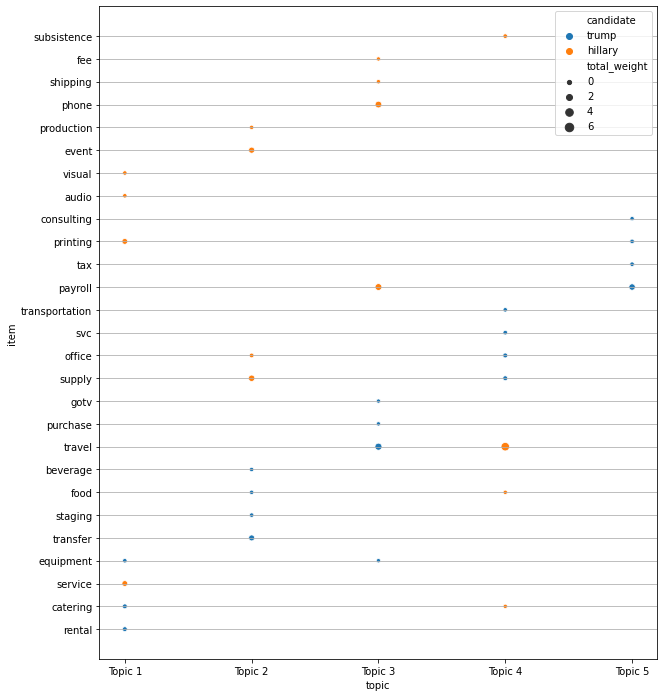

In [38]:
dt16 = ew_data[ew_data.term ==2016]
sns.scatterplot(y='item', x='topic',hue='candidate', data=dt16, size = 'total_weight' )
plt.xticks([0,1,2,3,4], ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])
fig = plt.gcf()
plt.grid(axis="y")
fig.set_size_inches(10, 12)

**<div class="alert alert-block alert-warning">Top Topic Keywords<br><br><li>Trump:<br><br>Travel | Payroll | Transfer | Supply, Office | Rental, Catering<br><br><li>Hillary:<br><br>Travel | Payroll, Phone | Supply, Event | Service, Printing**

## 2020 Biden v.s. Trump

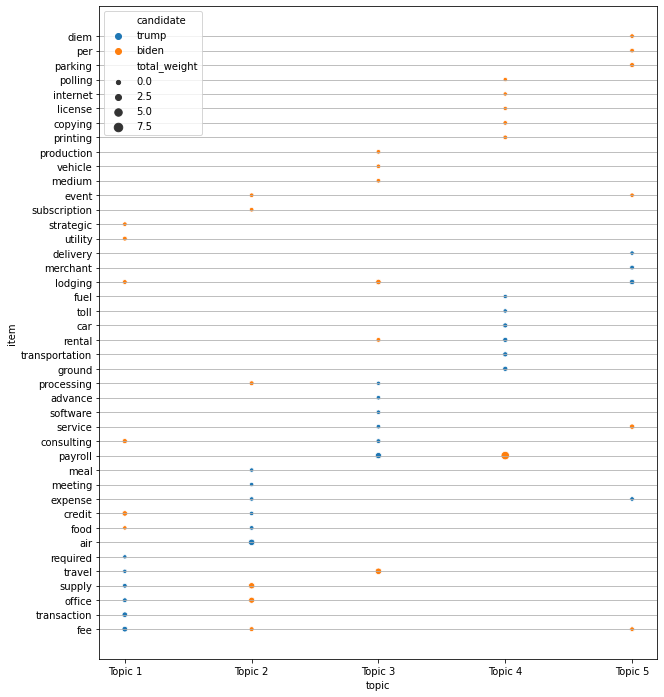

In [39]:
dt20 = ew_data[ew_data.term ==2020]
sns.scatterplot(y='item', x='topic',hue='candidate', data=dt20, size = 'total_weight' )
plt.xticks([0,1,2,3,4], ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])
fig = plt.gcf()
plt.grid(axis="y")
fig.set_size_inches(10, 12)

**<div class="alert alert-block alert-warning">Top Topic Keywords<br><br><li>Biden:<br><br>Payroll | Travel, Lodging | Supply, Office | Credit, Consulting | Service, Parking<br><br><li>Trump:<br><br>Air | Payroll | Fee, Transaction | Lodging | Ground, Transportation, Rental, Car**

## Disbursement Text Wordnet (2008 Obama v.s. Mccain as Example) 

In [1]:
from pyvis.network import Network
import pandas as pd

In [2]:
ew_data = pd.read_csv("ew_data.csv")
dt08 = ew_data[ew_data.term ==2008]

In [3]:
wn2008 = Network(height="750px", width="100%", bgcolor="#123456", font_color="white", notebook =True, heading ='2008 Election Expense Wordnet')
wn2008.barnes_hut()

In [4]:
#define nodes 
candidate = dt08['candidate']
topic = dt08['topic_code']
word = dt08['item']
weight = dt08['total_weight']
edge_data = zip(candidate, topic, word, weight)
#add node and edge to the net
for e in edge_data:
    nm = e[0]
    tpc = e[1]
    w = e[2]
    wt = e[3]
# name-topic
    wn2008.add_node(nm,nm,color="red")
    wn2008.add_node(tpc,tpc)
    wn2008.add_edge(nm,tpc)
# topic-word
    wn2008.add_node(w,w)
    wn2008.add_edge(tpc,w,value=wt)

In [5]:
#wn2008.show_buttons()
wn2008.show('2008_Election_Expense_Wordnet.html')